# Deep Learning with Keras

This notebook shows how to build a deep learning model to predict the quality score of different wines

In [1]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [2]:
# Upload winequality.csv to Colab
from google.colab import files

csv_file = files.upload()

Saving winequality.csv to winequality (1).csv


In [3]:
# Read in data
df = pd.read_csv("winequality.csv", delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Create the features (X) and target (y) sets
X = df.iloc[:, 0:11].values
y = df["quality"].values

In [5]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

## Define a model with 1 hidden layer

In [6]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 11

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [7]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 5ms/step - loss: 29.6981 - mse: 29.6981 - val_loss: 30.1991 - val_mse: 30.1991
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 26.7554 - mse: 26.7554 - val_loss: 27.4546 - val_mse: 27.4546
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 23.7791 - mse: 23.7791 - val_loss: 24.7608 - val_mse: 24.7608
Epoch 4/200
35/35 [==============================] - 0s 2ms/step - loss: 20.8628 - mse: 20.8628 - val_loss: 22.2068 - val_mse: 22.2068
Epoch 5/200
35/35 [==============================] - 0s 2ms/step - loss: 18.1137 - mse: 18.1137 - val_loss: 19.7640 - val_mse: 19.7640
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 15.6804 - mse: 15.6804 - val_loss: 17.4373 - val_mse: 17.4373
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 13.6005 - mse: 13.6005 - val_loss: 15.2988 - val_mse: 15.2988
Epoch 8/200
35/35 [==============================] - 0s

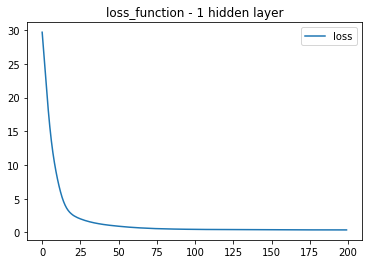

In [8]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

## Define a model with 2 hidden layers

In [9]:
# Define the model - deep neural net
number_input_features = 11
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [10]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 6ms/step - loss: 27.2657 - mse: 27.2657 - val_loss: 28.7596 - val_mse: 28.7596
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 22.8046 - mse: 22.8046 - val_loss: 25.8180 - val_mse: 25.8180
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 18.7927 - mse: 18.7927 - val_loss: 22.8622 - val_mse: 22.8622
Epoch 4/200
35/35 [==============================] - 0s 3ms/step - loss: 15.2888 - mse: 15.2888 - val_loss: 19.7964 - val_mse: 19.7964
Epoch 5/200
35/35 [==============================] - 0s 2ms/step - loss: 12.4215 - mse: 12.4215 - val_loss: 16.5153 - val_mse: 16.5153
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 10.1301 - mse: 10.1301 - val_loss: 13.3368 - val_mse: 13.3368
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 8.3040 - mse: 8.3040 - val_loss: 10.3299 - val_mse: 10.3299
Epoch 8/200
35/35 [==============================] - 0s 2

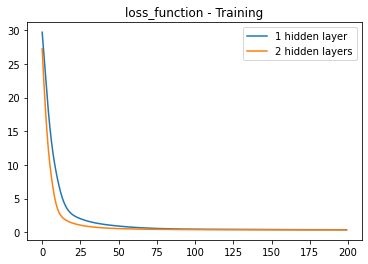

In [11]:
# Overlay the results of deep and shallow models
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

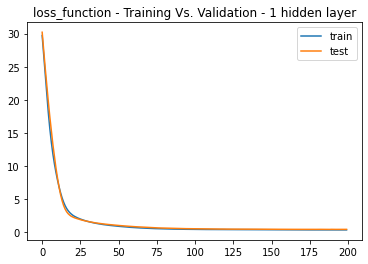

In [12]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

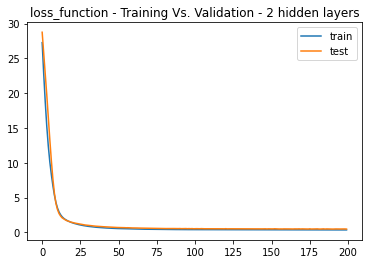

In [13]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()